## Imports

In [43]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

## Functions

## Data

In [44]:
jtplot.style('onedork')

In [2]:
project_name = "Dimensionality Reduction in Python"

data_files = os.listdir(f'data/{project_name}')
data_files

['Public_Schools2.csv',
 'pokemon.csv',
 'grocery_sales.csv',
 'ANSUR_II_MALE.csv',
 'PimaIndians.csv',
 'ANSUR_II_FEMALE.csv']

In [35]:
df_list = []
for file in data_files:
    df = pd.read_csv(f'data/{project_name}/{file}')
    df_list.append(df)
    print(file)
    print(df.shape)
    print('\n')

Public_Schools2.csv
(131, 21)


pokemon.csv
(800, 13)


grocery_sales.csv
(78, 4)


ANSUR_II_MALE.csv
(4082, 99)


PimaIndians.csv
(392, 9)


ANSUR_II_FEMALE.csv
(1986, 99)




## Pokemon basic example

In [18]:
pokemon_df = df_list[1]

print("Columns before dimensionality reduction")
print(pokemon_df.columns)
# Simulate exercise df
pokemon_df = pokemon_df[['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type 1', 'Legendary']]
pokemon_df.rename(columns={'Type 1' : 'Type'}, inplace=True)
print("Columns after first clean")
print(pokemon_df.columns)
print('\n')
print()

Columns before dimensionality reduction
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
Columns after first clean
Index(['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type', 'Legendary'], dtype='object')


In [19]:
#Some basic dimensinality reduction

# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


## Ansur data

In [41]:
asur_male = df_list[3]
asur_female = df_list[5]

height_cols = [col for col in asur_male.columns.tolist() if 'height' in col]

# print(asur_male[height_cols].head())

asur_male['body_height'] = asur_male.loc[:, height_cols].sum(axis=1)
asur_female['body_height'] = asur_female.loc[:, height_cols].sum(axis=1)

# simulate exercise dfs

exercise_columns = [
    'Gender','headlength','stature_m','weight_kg','footlength', 'wristheight', 'body_height'
]

exercise_asur_male = asur_male[exercise_columns].head(100)
exercise_asur_female = asur_female[exercise_columns].head(100)
exercise_asur_male['n_legs'] = 2
exercise_asur_female['n_legs'] = 2


ansur_df_1 = pd.concat([exercise_asur_male, exercise_asur_female])[
    ['Gender', 'weight_kg', 'stature_m', 'body_height']
]

ansur_df_2 = pd.concat([exercise_asur_male, exercise_asur_female])[
    ['Gender', 'footlength', 'headlength', 'n_legs']
]


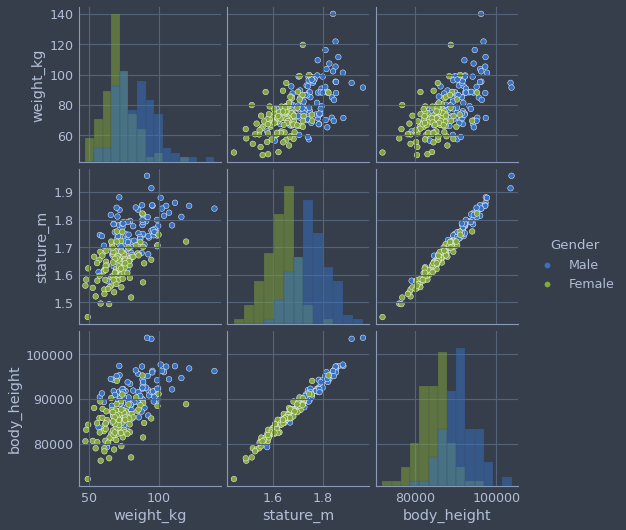

In [45]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()